In [10]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://dati.regione.sicilia.it/dataset/da5a0f1f-82b4-472f-b3dd-458295983a97/resource/6e3d48d9-d07a-4d36-90a3-423ca73e7e31/download/strutture_sanitarie.csv"
url_j="https://dati.regione.sicilia.it/dataset/da5a0f1f-82b4-472f-b3dd-458295983a97/resource/fb7a6382-459e-4799-b25e-b95f0e9e8255/download/strutture_sanitarie.json"

In [3]:
response = requests.get(url_j)
data = response.json()
df=pd.DataFrame(data)
print(df.head())

   Anno  Codice Regione  Codice Azienda Codice struttura  \
0  2018             190             201           400300   
1  2018             190             201           400400   
2  2018             190             201           400500   
3  2018             190             201           400700   
4  2018             190             201           400900   

  Tipo assistenza erogata     Descrizione tipo assistenza erogata  \
0                     S01                       ATTIVITA' CLINICA   
1                     S03                ATTIVITA' DI LABORATORIO   
2                     S01                       ATTIVITA' CLINICA   
3                     S01                       ATTIVITA' CLINICA   
4                     S02  DIAGNOSTICA STRUMENTALE E PER IMMAGINI   

                             Denominazione struttura Partita IVA  \
0                                ATTANASIO SALVATORE   679990846   
1  CENTRO ANALISI CLINICO BIOLOGICHE CACCIATORE M...  2080180843   
2                   

Se voglio caricare file csv:
df = pd.read_csv(url,sep=",")
print(df.head())

# Distribuzione delle Strutture Sanitarie in Sicilia per Tipo di Assistenza

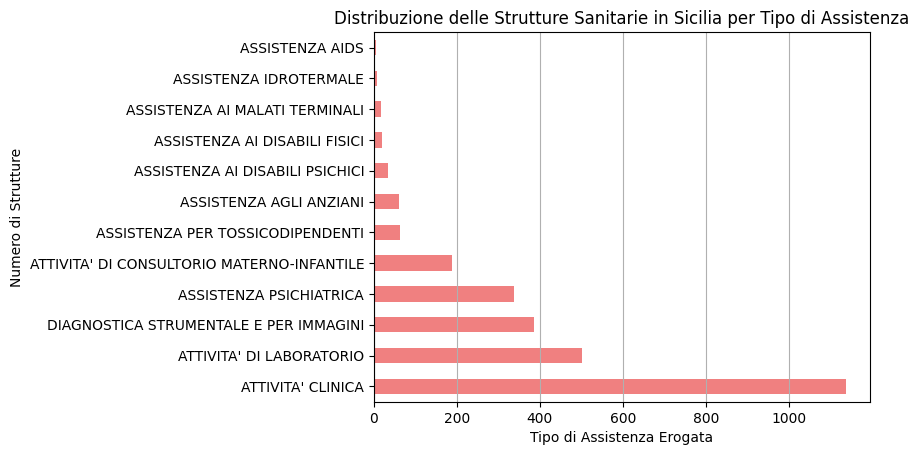

In [4]:
df_tipo_assistenza = df['Descrizione tipo assistenza erogata'].value_counts()
df_tipo_assistenza.plot(kind='barh', color='lightcoral')
plt.xlabel("Tipo di Assistenza Erogata")
plt.ylabel("Numero di Strutture")
plt.title("Distribuzione delle Strutture Sanitarie in Sicilia per Tipo di Assistenza")
plt.yticks(rotation=0)
plt.grid(axis="x")
plt.show()

# Distribuzione delle Strutture Sanitarie in Sicilia per Rapporto con il SSN


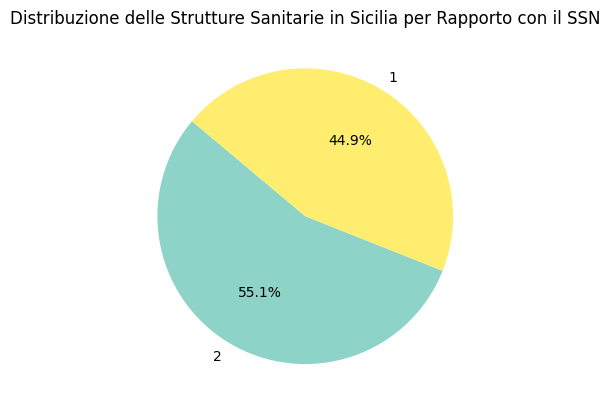

In [5]:
df_ssn = df['Tipo rapporto con il S.S.N.'].value_counts()
df_ssn.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Distribuzione delle Strutture Sanitarie in Sicilia per Rapporto con il SSN")
plt.ylabel("")
plt.show()

# Presenza di Apparecchiature nelle Strutture Sanitarie per Tipo di Struttura

In [6]:
df_apparecchiature = df.groupby(['Descrizione tipo assistenza erogata', 'Presenza Apparecchiature']).size().unstack()

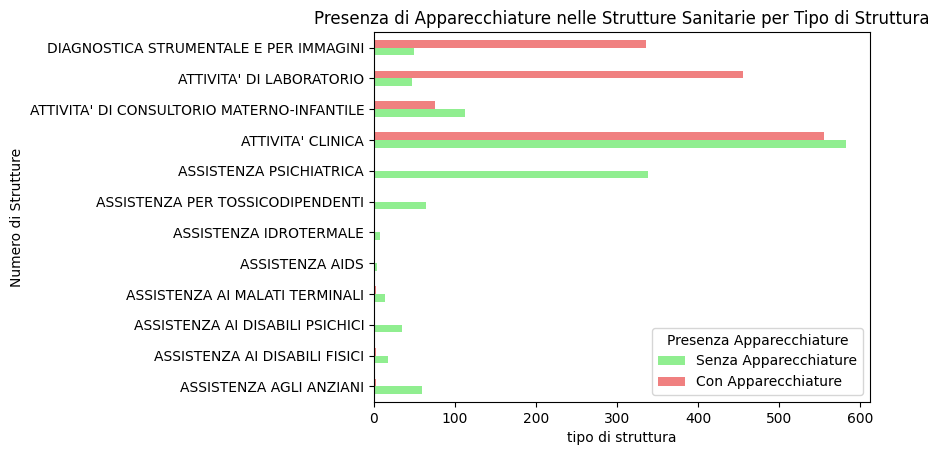

In [7]:
df_apparecchiature.plot(kind='barh', color=['lightgreen', 'lightcoral'])
plt.xlabel("tipo di struttura")
plt.ylabel("Numero di Strutture")
plt.title("Presenza di Apparecchiature nelle Strutture Sanitarie per Tipo di Struttura")
plt.xticks(rotation=0)
plt.legend(title="Presenza Apparecchiature", labels=["Senza Apparecchiature", "Con Apparecchiature"])
plt.show()

# Distribuzione delle Ore Settimanali di Apertura per Tipo di Attività Clinica

In [13]:
df1=df.dropna(subset=['Ore settimanali di apertura', 'Descrizione tipo assistenza erogata'])
df_activity_hours = df1.groupby('Tipo assistenza erogata')['Ore settimanali di apertura'].mean().sort_values()

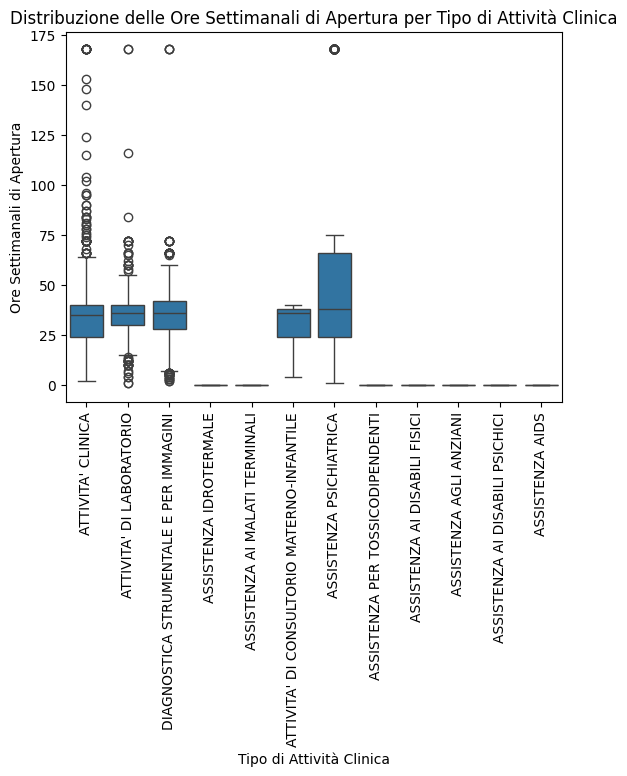

In [14]:
sns.boxplot(x='Descrizione tipo assistenza erogata', y='Ore settimanali di apertura', data=df)
plt.title("Distribuzione delle Ore Settimanali di Apertura per Tipo di Attività Clinica")
plt.xlabel("Tipo di Attività Clinica")
plt.ylabel("Ore Settimanali di Apertura")
plt.xticks(rotation=90)
plt.show()